# Esercitazione lab3

# Richieste:
+ Creare pipelines e confrontare risultati
+ Mostrare la `learning curve` di un pipeline

# Pipeline semplice

In [3]:
## Load dataset Wine

In [4]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
X = wine.data
y = wine.target

list(wine.target_names)

['class_0', 'class_1', 'class_2']

In [5]:
import inspect
inspect.signature(load_wine)

<Signature (*, return_X_y=False, as_frame=False)>

In [6]:
wine_df = load_wine(as_frame =True)
print(wine_df)

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  pro

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
y = le.fit_transform(y)
le.classes_

array([0, 1, 2])

In [8]:
## Split del dataset

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [10]:
## Pipeline con Scaler, PCA, Logistic Regression

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(),
                     PCA(n_components=2), 
                     LogisticRegression(random_state=1))

#pipe = make_pipeline(StandardScaler(),
#                     PCA(n_components=2),
#                     KNeighborsClassifier(n_neighbors=3))

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuratezza (Test): %.3f' % pipe.score(X_test, y_test))

Accuratezza (Test): 1.000


In [12]:
## Stratified KFold

In [13]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe.fit(X_train[train], y_train[train])
    score = pipe.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, dist. classi: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nAccuratezza media nella CV: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, dist. classi: [42 51 34], Acc: 1.000
Fold:  2, dist. classi: [42 51 34], Acc: 0.933
Fold:  3, dist. classi: [42 52 34], Acc: 0.929
Fold:  4, dist. classi: [42 52 34], Acc: 1.000
Fold:  5, dist. classi: [42 52 34], Acc: 1.000
Fold:  6, dist. classi: [43 51 34], Acc: 0.857
Fold:  7, dist. classi: [43 51 34], Acc: 0.929
Fold:  8, dist. classi: [43 51 34], Acc: 0.857
Fold:  9, dist. classi: [42 51 35], Acc: 0.929
Fold: 10, dist. classi: [42 51 35], Acc: 1.000

Accuratezza media nella CV: 0.943 +/- 0.053


In [14]:
## cross_val_score

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('Accuratezze nella CV: %s' % scores)
print('Accuratezza media della CV: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuratezze nella CV: [1.         0.93333333 0.92857143 1.         1.         0.85714286
 0.92857143 0.85714286 0.92857143 1.        ]
Accuratezza media della CV: 0.943 +/- 0.053


In [16]:
## Learning Curve estimation (di un pipeline)

In [17]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', 
                                           solver='lbfgs', 
                                           max_iter=10_000, 
                                           random_state=1))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

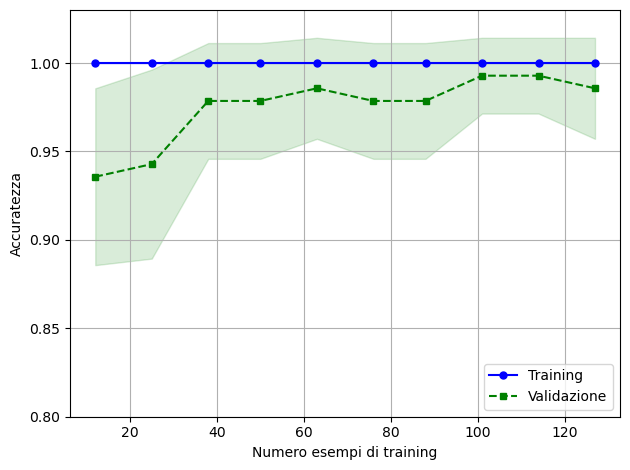

In [18]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', 
         markersize=5, label='Training')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', 
         marker='s', markersize=5, label='Validazione')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Numero esempi di training')
plt.ylabel('Accuratezza')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

# Pipelines per l'esame
Immaginiamo prove 

Confrontare 2 modelli SVC e Random Forest su un dataset creato con make e' un altro wines, e vedere quale mdoello performa meglio.

Nel pipeline bisogna:
1. Scaling
2. Ridurre le dimensioni
3. Possibilmente visualizzare le dimensioni ottenute
4. Applicare il modello
5. Ottenere l'accuracy

# Prova 1 SVC + RF 

## Wine dataset

In [47]:
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y= True)

In [48]:
wine = load_wine()
list(wine.target_names)

['class_0', 'class_1', 'class_2']

## Nested CV

In [49]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

def nested_cv(model, param_grid, X, y, outer_splits=5,
              inner_splits=5, scoring=['accuracy'], random_state=42, verbose=True):

    outer_cv = KFold(n_splits=outer_splits, shuffle=True, random_state=random_state)
    score_results = {metric: [] for metric in scoring}

    best_param_overall = None
    best_score = -np.inf 

    for outer_fold, (train_idx, test_idx) in enumerate(outer_cv.split(X), 1):
        if verbose:
            print(f"\nPerforming Outer Fold {outer_fold}/{outer_splits}")

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        inner_cv = KFold(n_splits=inner_splits, shuffle=True, random_state=random_state)
        if verbose:
            print("Performing GridSearchCV...")

        grid_search = GridSearchCV(model, param_grid, cv=inner_cv,
                                   n_jobs=-1, scoring=scoring[0])
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        if verbose:
            print(f" Best Params: {best_params}")

        y_pred = best_model.predict(X_test)

        if 'accuracy' in scoring:
            acc = accuracy_score(y_test, y_pred)
            score_results['accuracy'].append(acc)

            if acc > best_score:
                best_score = acc
                best_param_overall = best_params

            if verbose:
                print(f" Accuracy: {acc:.4f}")

    result = {}
    for metric, scores in score_results.items():
        result[f"Nested CV {metric.upper()}"] = f"{np.mean(scores):.4f} ± {np.std(scores):.4f}"

    result["Best Parameters with highest accuracy"] = best_param_overall

    return result

## Nested CV con AUC ROC

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

def nested_cv_auc(model, param_grid, X, y, outer_splits=5,
              inner_splits=5, scoring=['accuracy', 'roc_auc'],
              random_state=42, verbose=True):

    outer_cv = KFold(n_splits=outer_splits, shuffle=True, random_state=random_state)
    score_results = {metric: [] for metric in scoring}

    best_param_overall = None
    best_score = -np.inf 

    for outer_fold, (train_idx, test_idx) in enumerate(outer_cv.split(X), 1):
        if verbose:
            print(f"\nPerforming Outer Fold {outer_fold}/{outer_splits}")

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        inner_cv = KFold(n_splits=inner_splits, shuffle=True, random_state=random_state)
        if verbose:
            print("Performing GridSearchCV...")

        grid_search = GridSearchCV(model, param_grid, cv=inner_cv,
                                   n_jobs=-1, scoring=scoring[0])
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        if verbose:
            print(f" Best Params: {best_params}")

        y_pred = best_model.predict(X_test)

        if 'accuracy' in scoring:
            acc = accuracy_score(y_test, y_pred)
            score_results['accuracy'].append(acc)
            if acc > best_score:
                best_score = acc
                best_param_overall = best_params
            if verbose:
                print(f" Accuracy: {acc:.4f}")

        if 'roc_auc' in scoring:
            try:
                y_score = best_model.predict_proba(X_test)[:, 1]  
                auc = roc_auc_score(y_test, y_score)
                score_results['roc_auc'].append(auc)
                if verbose:
                    print(f" AUC: {auc:.4f}")
            except AttributeError:
                if verbose:
                    print("Controlla se ha l'opzione di probability.")
                score_results['roc_auc'].append(np.nan)

    result = {}
    for metric, scores in score_results.items():
        result[f"Nested CV {metric.upper()}"] = f"{np.nanmean(scores):.4f} ± {np.nanstd(scores):.4f}"

    result["Best Parameters with highest accuracy"] = best_param_overall

    return result

## SVC pipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time

pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components= 2)),
    ('svc', SVC())
])

params_grid_svc = {
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto']
}

In [51]:
start_time = time.time()

results_svc = nested_cv(pipeline_svc, params_grid_svc, X, y,
                        outer_splits=5, inner_splits=5,
                        scoring=['accuracy'])

end_time = time.time()

print(f'Results SVC: \n{results_svc}')
print(f'Tempo di esecuzione (SVC): {end_time - start_time:.2f} secondi')


Performing Outer Fold 1/5
Performing GridSearchCV...
 Best Params: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
 Accuracy: 1.0000

Performing Outer Fold 2/5
Performing GridSearchCV...
 Best Params: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
 Accuracy: 0.9444

Performing Outer Fold 3/5
Performing GridSearchCV...
 Best Params: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
 Accuracy: 0.9722

Performing Outer Fold 4/5
Performing GridSearchCV...
 Best Params: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
 Accuracy: 0.9714

Performing Outer Fold 5/5
Performing GridSearchCV...
 Best Params: {'svc__C': 1, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
 Accuracy: 0.9143
Results SVC: 
{'Nested CV ACCURACY': '0.9605 ± 0.0290', 'Best Parameters with highest accuracy': {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}}
Tempo di esecuzione (SVC): 2.03 secondi


## RF pipeline

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components= 2)),
    ('rf', RandomForestClassifier())
])

params_grid_rf = {
    'rf__criterion': ['gini', 'log_loss', 'entropy'],
    'rf__max_depth': [10, 20, 30],
    'rf__max_features': ['log2', 'sqrt']
}

In [25]:
start_time = time.time()

results_rf = nested_cv(pipeline_rf, params_grid_rf, X, y,
                       outer_splits=5, inner_splits=5,
                       scoring=['accuracy'])

end_time = time.time()

print(f'Results RF: \n{results_rf}')
print(f'Tempo di esecuzione (RF): {end_time - start_time:.2f} secondi')


Performing Outer Fold 1/5
Performing GridSearchCV...
 Best Params: {'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__max_features': 'sqrt'}
 Accuracy: 1.0000

Performing Outer Fold 2/5
Performing GridSearchCV...
 Best Params: {'rf__criterion': 'log_loss', 'rf__max_depth': 20, 'rf__max_features': 'sqrt'}
 Accuracy: 0.9167

Performing Outer Fold 3/5
Performing GridSearchCV...
 Best Params: {'rf__criterion': 'gini', 'rf__max_depth': 20, 'rf__max_features': 'log2'}
 Accuracy: 1.0000

Performing Outer Fold 4/5
Performing GridSearchCV...
 Best Params: {'rf__criterion': 'log_loss', 'rf__max_depth': 10, 'rf__max_features': 'sqrt'}
 Accuracy: 0.9714

Performing Outer Fold 5/5
Performing GridSearchCV...
 Best Params: {'rf__criterion': 'log_loss', 'rf__max_depth': 20, 'rf__max_features': 'log2'}
 Accuracy: 0.9143
Results RF: 
{'Nested CV ACCURACY': '0.9605 ± 0.0382', 'Best Parameters with highest accuracy': {'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__max_features': 'sqrt'}}
Tempo di es

# Prova 2 Boosting + Bagging 

## make_classification dataset

In [26]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=2000,            # numero di osservazioni
    n_features=20,             # numero totale di feature
    n_classes=2,               # numero di classi (binary classification)
    n_clusters_per_class=2,   # quanti gruppi interni ha ciascuna classe
    flip_y=0.01,               # rumore (1% delle etichette vengono invertite)
    class_sep=1.0,             # separabilità tra classi (più alto = più facile)
    random_state=42
)

print('X shape', X.shape)
print('y shape', y.shape)

list(y[:5])

X shape (2000, 20)
y shape (2000,)


[1, 0, 0, 1, 1]

## tSNE per visualizzazione

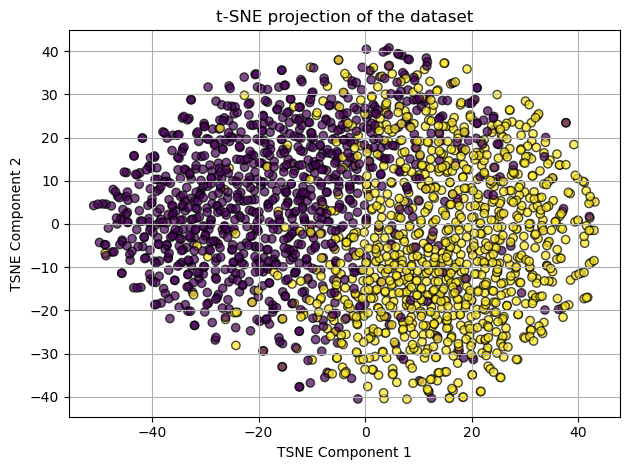

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply TSNE separately
X_scaled = StandardScaler().fit_transform(X)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

# Plot TSNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE projection of the dataset')
plt.grid(True)
plt.tight_layout()
plt.show()

## Nested CV - gia' caricato

## Bagging pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

pipeline_bgc = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA(n_components=2, kernel='rbf')),
    ('bagging', BaggingClassifier())
])

bgc_params = {
    "bagging__n_estimators": [10, 20, 50],
    "bagging__estimator": [DecisionTreeClassifier(max_depth=3), KNeighborsClassifier(n_neighbors=3)],  
    "bagging__bootstrap": [True, False]
}

In [29]:
start_time = time.time()

bgc_results = nested_cv(pipeline_bgc, bgc_params, X, y,
                                   outer_splits = 5, inner_splits = 5,
                                   scoring = ["accuracy"])

end_time = time.time()

print(f"Bagging Classifier results: \n{bgc_results}")
print(f"Execution time: {end_time - start_time} s")


Performing Outer Fold 1/5
Performing GridSearchCV...
 Best Params: {'bagging__bootstrap': True, 'bagging__estimator': KNeighborsClassifier(n_neighbors=3), 'bagging__n_estimators': 50}
 Accuracy: 0.9025

Performing Outer Fold 2/5
Performing GridSearchCV...
 Best Params: {'bagging__bootstrap': True, 'bagging__estimator': DecisionTreeClassifier(max_depth=3), 'bagging__n_estimators': 10}
 Accuracy: 0.8725

Performing Outer Fold 3/5
Performing GridSearchCV...
 Best Params: {'bagging__bootstrap': False, 'bagging__estimator': DecisionTreeClassifier(max_depth=3), 'bagging__n_estimators': 10}
 Accuracy: 0.8750

Performing Outer Fold 4/5
Performing GridSearchCV...
 Best Params: {'bagging__bootstrap': True, 'bagging__estimator': DecisionTreeClassifier(max_depth=3), 'bagging__n_estimators': 50}
 Accuracy: 0.8600

Performing Outer Fold 5/5
Performing GridSearchCV...
 Best Params: {'bagging__bootstrap': True, 'bagging__estimator': DecisionTreeClassifier(max_depth=3), 'bagging__n_estimators': 20}
 A

## Boosting pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
import time

pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA(n_components=2, kernel='rbf')),
    ('ada',AdaBoostClassifier())
])

ada_params = {
    "ada__n_estimators" : [50, 100, 150],
     "ada__learning_rate" : [0.1, 0.01, 0.001]
}

In [31]:
start_time = time.time()

bgc_results = nested_cv(pipeline_ada, ada_params, X, y,
                                   outer_splits = 5, inner_splits = 5,
                                   scoring = ["accuracy"])

end_time = time.time()

print(f"Ada Boosting Classifier results: \n{bgc_results}")
print(f"Execution time: {end_time - start_time} s")


Performing Outer Fold 1/5
Performing GridSearchCV...
 Best Params: {'ada__learning_rate': 0.1, 'ada__n_estimators': 100}
 Accuracy: 0.8975

Performing Outer Fold 2/5
Performing GridSearchCV...
 Best Params: {'ada__learning_rate': 0.1, 'ada__n_estimators': 150}
 Accuracy: 0.8725

Performing Outer Fold 3/5
Performing GridSearchCV...
 Best Params: {'ada__learning_rate': 0.1, 'ada__n_estimators': 50}
 Accuracy: 0.8625

Performing Outer Fold 4/5
Performing GridSearchCV...
 Best Params: {'ada__learning_rate': 0.01, 'ada__n_estimators': 100}
 Accuracy: 0.8675

Performing Outer Fold 5/5
Performing GridSearchCV...
 Best Params: {'ada__learning_rate': 0.1, 'ada__n_estimators': 150}
 Accuracy: 0.9275
Ada Boosting Classifier results: 
{'Nested CV ACCURACY': '0.8855 ± 0.0242', 'Best Parameters with highest accuracy': {'ada__learning_rate': 0.1, 'ada__n_estimators': 150}}
Execution time: 26.76266860961914 s


## Processi Gaussiani pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
import time

pipeline_gpc = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA(n_components=2, kernel='rbf')),
    ('gpc', GaussianProcessClassifier())
])

gpc_params = {
    "gpc__warm_start": [True, False],
    'gpc__n_restarts_optimizer': [0, 3, 5]
}

In [33]:
start_time = time.time()

gpc_results = nested_cv(pipeline_gpc, gpc_params, X, y,
                                   outer_splits = 5, inner_splits = 5,
                                   scoring = ["accuracy"])

end_time = time.time()

print(f"Processi gaussiani results: \n{gpc_results}")
print(f"Execution time: {end_time - start_time} s")


Performing Outer Fold 1/5
Performing GridSearchCV...
 Best Params: {'gpc__n_restarts_optimizer': 0, 'gpc__warm_start': True}
 Accuracy: 0.9050

Performing Outer Fold 2/5
Performing GridSearchCV...
 Best Params: {'gpc__n_restarts_optimizer': 0, 'gpc__warm_start': True}
 Accuracy: 0.8825

Performing Outer Fold 3/5
Performing GridSearchCV...
 Best Params: {'gpc__n_restarts_optimizer': 0, 'gpc__warm_start': True}
 Accuracy: 0.8625

Performing Outer Fold 4/5
Performing GridSearchCV...
 Best Params: {'gpc__n_restarts_optimizer': 0, 'gpc__warm_start': True}
 Accuracy: 0.8700

Performing Outer Fold 5/5
Performing GridSearchCV...
 Best Params: {'gpc__n_restarts_optimizer': 0, 'gpc__warm_start': True}
 Accuracy: 0.9200
Processi gaussiani results: 
{'Nested CV ACCURACY': '0.8880 ± 0.0215', 'Best Parameters with highest accuracy': {'gpc__n_restarts_optimizer': 0, 'gpc__warm_start': True}}
Execution time: 57.840919494628906 s


# Prova 3 Regressione pipeline

## Diabetes dataset

In [34]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = load_diabetes(return_X_y= True)

print(diabetes.data.shape, diabetes.target.shape)
print(diabetes.feature_names)

(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Nested CV per regressione

In [35]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def nested_cv_regression(model, param_grid, X, y, outer_splits=5,
                         inner_splits=5, scoring=None, random_state=42, verbose=True):
    if scoring is None:
        scoring = ['r2']  # Default metric

    outer_cv = KFold(n_splits=outer_splits, shuffle=True, random_state=random_state)
    score_results = {metric: [] for metric in scoring}

    best_param_overall = None
    best_r2_score = -np.inf 

    for outer_fold, (train_idx, test_idx) in enumerate(outer_cv.split(X), 1):
        if verbose:
            print(f"\nPerforming Outer Fold {outer_fold}/{outer_splits}")

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        inner_cv = KFold(n_splits=inner_splits, shuffle=True, random_state=random_state)
        if verbose:
            print("Performing GridSearchCV...")

        grid_search = GridSearchCV(model, param_grid, cv=inner_cv,
                                   n_jobs=-1, scoring=scoring[0])
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        if verbose:
            print(f" Best Params: {best_params}")

        y_pred = best_model.predict(X_test)

        if 'r2' in scoring:
            r2 = r2_score(y_test, y_pred)
            score_results['r2'].append(r2)
            if r2 > best_r2_score:
                best_r2_score = r2
                best_param_overall = best_params
            if verbose:
                print(f" R²: {r2:.4f}")

        if 'mae' in scoring:
            mae = mean_absolute_error(y_test, y_pred)
            score_results['mae'].append(mae)
            if verbose:
                print(f" MAE: {mae:.4f}")

        if 'rmse' in scoring:
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            score_results['rmse'].append(rmse)
            if verbose:
                print(f" RMSE: {rmse:.4f}")

    result = {}
    for metric, scores in score_results.items():
        result[f"Nested CV {metric.upper()}"] = f"{np.mean(scores):.4f} ± {np.std(scores):.4f}"

    result["Best Parameters with highest R2 score"] = best_param_overall

    return result

## Ridge Regression pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import time
from sklearn.linear_model import Ridge

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA(n_components=2, kernel='rbf')),
    ('ridge', Ridge())
])

ridge_params = {
    'ridge__alpha': [1, 0.1, 0.01, 0.001, 0.0001], 
    'ridge__fit_intercept': [True, False],
    'ridge__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [37]:
t0 = time.time()

ridge_results = nested_cv_regression(pipeline_ridge, ridge_params, X, y, 
                          outer_splits = 5, inner_splits = 5, 
                          scoring = ['r2', 'rmse'])

t1 = time.time()

print(f'Ridge Regression Results: \n {ridge_results}')
print(f'Training Ridge model in {(t1 - t0):.3f}s')


Performing Outer Fold 1/5
Performing GridSearchCV...
 Best Params: {'ridge__alpha': 0.0001, 'ridge__fit_intercept': True, 'ridge__solver': 'sag'}
 R²: 0.2858
 RMSE: 61.5131

Performing Outer Fold 2/5
Performing GridSearchCV...
 Best Params: {'ridge__alpha': 0.001, 'ridge__fit_intercept': True, 'ridge__solver': 'sag'}
 R²: 0.3085
 RMSE: 65.6814

Performing Outer Fold 3/5
Performing GridSearchCV...
 Best Params: {'ridge__alpha': 0.01, 'ridge__fit_intercept': True, 'ridge__solver': 'sag'}
 R²: 0.1044
 RMSE: 69.8175

Performing Outer Fold 4/5
Performing GridSearchCV...
 Best Params: {'ridge__alpha': 0.001, 'ridge__fit_intercept': True, 'ridge__solver': 'sag'}
 R²: 0.3475
 RMSE: 66.2668

Performing Outer Fold 5/5
Performing GridSearchCV...
 Best Params: {'ridge__alpha': 0.001, 'ridge__fit_intercept': True, 'ridge__solver': 'sag'}
 R²: 0.2795
 RMSE: 63.4481
Ridge Regression Results: 
 {'Nested CV R2': '0.2652 ± 0.0838', 'Nested CV RMSE': '65.3454 ± 2.8017', 'Best Parameters with highest R2 

## SVR pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import time
from sklearn.svm import SVR

pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA(n_components=2, kernel='rbf')),
    ('svr', SVR())
])

svr_params = {
    'svr__C': [0.1, 1, 10],                     # Regolarizzazione
    'svr__kernel': ['linear', 'poly', 'rbf'],
    'svr__degree': [2, 3, 4],                   # Grado di polinomio
    'svr__gamma': ['scale', 'auto'],            
    'svr__epsilon': [0.1, 0.2, 0.5]             
}

In [39]:
start_time = time.time()

svr_results = nested_cv_regression(pipeline_svr, svr_params, X, y, 
                                     outer_splits=5, inner_splits=5, 
                                     scoring=['r2'])

end_time = time.time()

print(f'SVR Results: \n{svr_results}')
print(f'Tempo di esecuzione: {end_time - start_time} secondi')


Performing Outer Fold 1/5
Performing GridSearchCV...
 Best Params: {'svr__C': 10, 'svr__degree': 2, 'svr__epsilon': 0.5, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
 R²: 0.2737

Performing Outer Fold 2/5
Performing GridSearchCV...
 Best Params: {'svr__C': 10, 'svr__degree': 2, 'svr__epsilon': 0.5, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
 R²: 0.2090

Performing Outer Fold 3/5
Performing GridSearchCV...
 Best Params: {'svr__C': 10, 'svr__degree': 3, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
 R²: 0.0784

Performing Outer Fold 4/5
Performing GridSearchCV...
 Best Params: {'svr__C': 10, 'svr__degree': 3, 'svr__epsilon': 0.5, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
 R²: 0.3783

Performing Outer Fold 5/5
Performing GridSearchCV...
 Best Params: {'svr__C': 10, 'svr__degree': 2, 'svr__epsilon': 0.5, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
 R²: 0.2733
SVR Results: 
{'Nested CV R2': '0.2425 ± 0.0984', 'Best Parameters with highest R2 score': {'svr__C': 10,

## RF regressor pipeline 

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import time
from sklearn.ensemble import RandomForestRegressor

pipeline_rfr = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA(n_components=2, kernel='rbf')),
    ('rfr', RandomForestRegressor(random_state = 42))
])

rfr_params = {
    "rfr__n_estimators": [50, 100, 200],
    "rfr__max_depth": [2, 4, 6, None],
    "rfr__min_samples_split": [2, 5, 10],
     "rfr__min_samples_leaf": [1, 2, 4]
}

In [41]:
start_time = time.time()

rfr_results = nested_cv_regression(pipeline_rfr, rfr_params, X, y, 
                                  outer_splits = 5, inner_splits = 5,
                                  scoring = ["r2", "rmse", "mae"])

end_time = time.time()

print(f"Random Forest Regressor results:")
display(rfr_results)
print(f"Execution time: {end_time - start_time} s")


Performing Outer Fold 1/5
Performing GridSearchCV...
 Best Params: {'rfr__max_depth': 2, 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 100}
 R²: 0.2610
 MAE: 52.1426
 RMSE: 62.5717

Performing Outer Fold 2/5
Performing GridSearchCV...
 Best Params: {'rfr__max_depth': 2, 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 100}
 R²: 0.2703
 MAE: 56.6658
 RMSE: 67.4721

Performing Outer Fold 3/5
Performing GridSearchCV...
 Best Params: {'rfr__max_depth': 2, 'rfr__min_samples_leaf': 4, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 200}
 R²: 0.1037
 MAE: 57.9625
 RMSE: 69.8460

Performing Outer Fold 4/5
Performing GridSearchCV...
 Best Params: {'rfr__max_depth': 4, 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 200}
 R²: 0.3197
 MAE: 55.6644
 RMSE: 67.6635

Performing Outer Fold 5/5
Performing GridSearchCV...
 Best Params: {'rfr__max_depth': 4, 'rfr__min_samples_leaf': 2, 'rfr__min_samples_split': 

{'Nested CV R2': '0.2404 ± 0.0726',
 'Nested CV RMSE': '66.4829 ± 2.5143',
 'Nested CV MAE': '55.7421 ± 1.9509',
 'Best Parameters with highest R2 score': {'rfr__max_depth': 4,
  'rfr__min_samples_leaf': 1,
  'rfr__min_samples_split': 2,
  'rfr__n_estimators': 200}}

Execution time: 139.3137788772583 s


# Extra:

## Prova 4 Classificazione con outlier removal

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.impute import SimpleImputer
import numpy as np
import time

## Pinguini dataset

In [43]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load penguins dataset from seaborn
penguins = sns.load_dataset('penguins')

X = penguins.drop(columns=['species'])
y = penguins['species']

le = LabelEncoder()
y = le.fit_transform(y)

In [44]:
# Encode categorical features
X_encoded = pd.get_dummies(X)

from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
inliers = iso.fit_predict(X_encoded) == 1

X_filtered = X_encoded[inliers]
y_filtered = y[inliers]

print(X_filtered.shape, y_filtered.shape)

(326, 9) (326,)


In [45]:
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaling', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('rf', RandomForestClassifier(random_state=42))
])

params_grid_rf = {
    'rf__criterion': ['gini', 'log_loss', 'entropy'],
    'rf__max_depth': [10, 20, 30],
    'rf__max_features': ['log2', 'sqrt']
}

In [46]:
from sklearn.model_selection import GridSearchCV

start_time = time.time()

grid_search = GridSearchCV(pipeline_rf, params_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_filtered, y_filtered)

end_time = time.time()

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
print(f"Execution time: {end_time - start_time:.2f} seconds")

Best parameters: {'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__max_features': 'log2'}
Best cross-validation accuracy: 0.9570
Execution time: 4.97 seconds
